# Name : Mayuri Mahesh Gade
## Assignement No 07
### LOGISTIC REGRESSION

### Step 1: Data Exploration

In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [5]:
# Examine the features, their types, and summary statistics
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

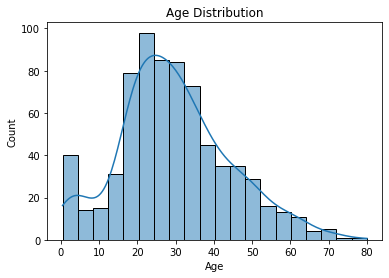

In [7]:
# Visualize the distribution of features
sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

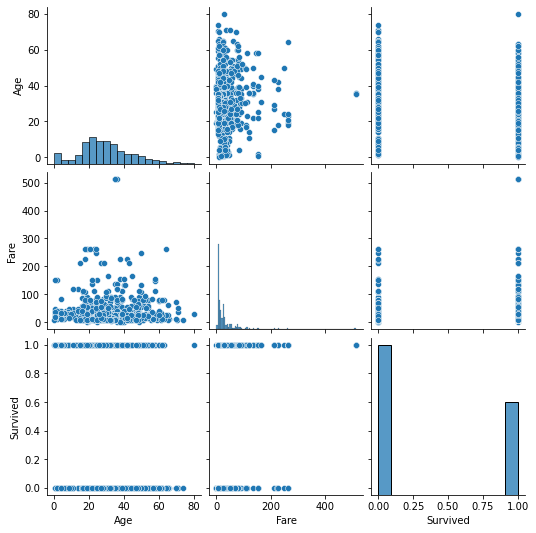

In [8]:
# Visualize the relationship between features
sns.pairplot(train_data[['Age', 'Fare', 'Survived']])
plt.show()

### Step 2 : Data Preprocessing:

In [9]:
# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [10]:
# Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [11]:
# Drop columns that won't be used for training
train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [12]:
# Separate features and target variable
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
X_test = test_data.copy()

### Step 3 : Model Building

In [16]:
# Import necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
# Split training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [18]:
# Build the logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train_split, y_train_split)

LogisticRegression(max_iter=500)

In [19]:
# Predict on the validation set
y_val_pred = model.predict(X_val_split)

### Step 4 : Model Evaluation

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [22]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_val_split, y_val_pred)
precision = precision_score(y_val_split, y_val_pred)
recall = recall_score(y_val_split, y_val_pred)
f1 = f1_score(y_val_split, y_val_pred)
roc_auc = roc_auc_score(y_val_split, y_val_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC Score: {roc_auc}')

Accuracy: 0.8044692737430168
Precision: 0.7746478873239436
Recall: 0.7432432432432432
F1 Score: 0.7586206896551724
ROC-AUC Score: 0.7954311454311453


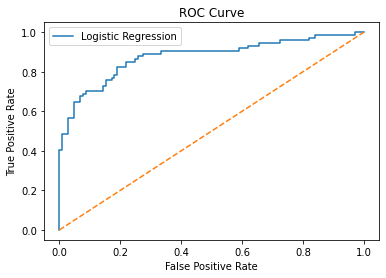

In [23]:
# Visualize the ROC curve
fpr, tpr, _ = roc_curve(y_val_split, model.predict_proba(X_val_split)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Step 5 : Interpretation

In [24]:
# Interpreting coefficients
coefficients = pd.DataFrame(model.coef_[0], X_train.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

             Coefficient
Fare            0.002534
PassengerId     0.000350
Age            -0.031287
Embarked_Q     -0.049652
Parch          -0.122180
SibSp          -0.291983
Embarked_S     -0.383426
Pclass         -0.954503
Sex_male       -2.642497


### Step 6 : Deployment with Streamlit

In [27]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not 


  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.8.0
    Uninstalling typing-extensions-4.8.0:
      Successfully uninstalled typing-extensions-4.8.0


In [28]:
# Install Streamlit if needed: pip install streamlit

# Streamlit App for model deployment
import streamlit as st
import pickle

In [34]:
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [31]:
# Assuming you saved your model using pickle
# Save model: with open('logistic_model.pkl', 'wb') as f: pickle.dump(model, f)
model = pickle.load(open('logistic_model.pkl', 'rb'))

st.title('Titanic Survival Prediction')

2024-09-15 12:05:43.356 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-15 12:05:43.540 
  command:

    streamlit run C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-09-15 12:05:43.542 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [47]:
# Assuming this is how you trained your model, with these exact columns:
columns_used_during_training = X_train.columns  # X_train from training step

In [48]:
# User input form for predictions
pclass = st.selectbox('Pclass', [1, 2, 3])  # Corrected 'selectbox'
age = st.slider('Age', 1, 100)
fare = st.slider('Fare', 0, 600)
sex = st.selectbox('Sex', ['male', 'female'])
embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])

2024-09-15 12:09:56.856 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-15 12:09:56.857 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-15 12:09:56.860 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-15 12:09:56.863 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-15 12:09:56.865 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-15 12:09:56.867 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-15 12:09:56.878 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-15 12:09:56.880 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [50]:
# Prepare the user input with all necessary features in the right order
user_input_dict = {
    'Pclass': [pclass],
    'Age': [age],
    'Fare': [fare],
    'Sex_male': [1 if sex == 'male' else 0],  # Assuming 'Sex_male' was encoded
    'Embarked_Q': [1 if embarked == 'Q' else 0],
    'Embarked_S': [1 if embarked == 'S' else 0],
    'SibSp': [0],  # Default or can add user input for this
    'Parch': [0],  # Default or can add user input for this
    'PassengerId': [9999],  # Dummy value
}

In [52]:
# Create a DataFrame from user input and ensure the column order matches the training data
user_input_df = pd.DataFrame(user_input_dict)
user_input_df = user_input_df.reindex(columns=columns_used_during_training, fill_value=0)

In [54]:
# Predict survival
prediction = model.predict(user_input_df)[0]

In [55]:
# Display the prediction result
st.write(f'The model predicts that this person {"will survive" if prediction == 1 else "will not survive"}')

2024-09-15 12:11:27.283 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-15 12:11:27.285 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-15 12:11:27.288 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-15 12:11:27.289 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


### On command prompt

In [58]:
import streamlit as st

st.title("Titanic Survival Prediction")
st.write("This is a simple Streamlit app for predicting survival on the Titanic.")

2024-09-15 12:55:35.078 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-15 12:55:35.084 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-15 12:55:35.089 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-15 12:55:35.090 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-15 12:55:35.091 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-15 12:55:35.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
